# DIGITAL EPIDEMIOLOGY - ASSIGNMENT #1

## PART 1: EPIDEMIC PROCESS ON A SOCIAL NETWORK

###### Author: Rossini Valerio
###### ID: 1613638

### 1.1

#### Consider either a synthetic Barabasi-Albert graph or a real social network (e.g., from the SNAP http://snap.stanford.edu/ or Konect http://konect.uni-koblenz.de/ repositories). If the chosen graph has multiple disconnected components, select the largest connected component. Make sure the graph has at least a few thousand nodes. Compute and plot the degree distribution.

In [2]:
# Load the libraries

import networkx as nx
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The network contains all the Wikipedia voting data from the inception of Wikipedia till January 2008. 

For more information: https://snap.stanford.edu/data/wiki-Vote.html

In [49]:
# Read graph in adjacency list format from path.

G=nx.read_adjlist("Wiki-Vote.txt")
print("number of nodes:", len(G.nodes()))
print("number of edges:", len(G.edges()))

number of nodes: 7115
number of edges: 100762


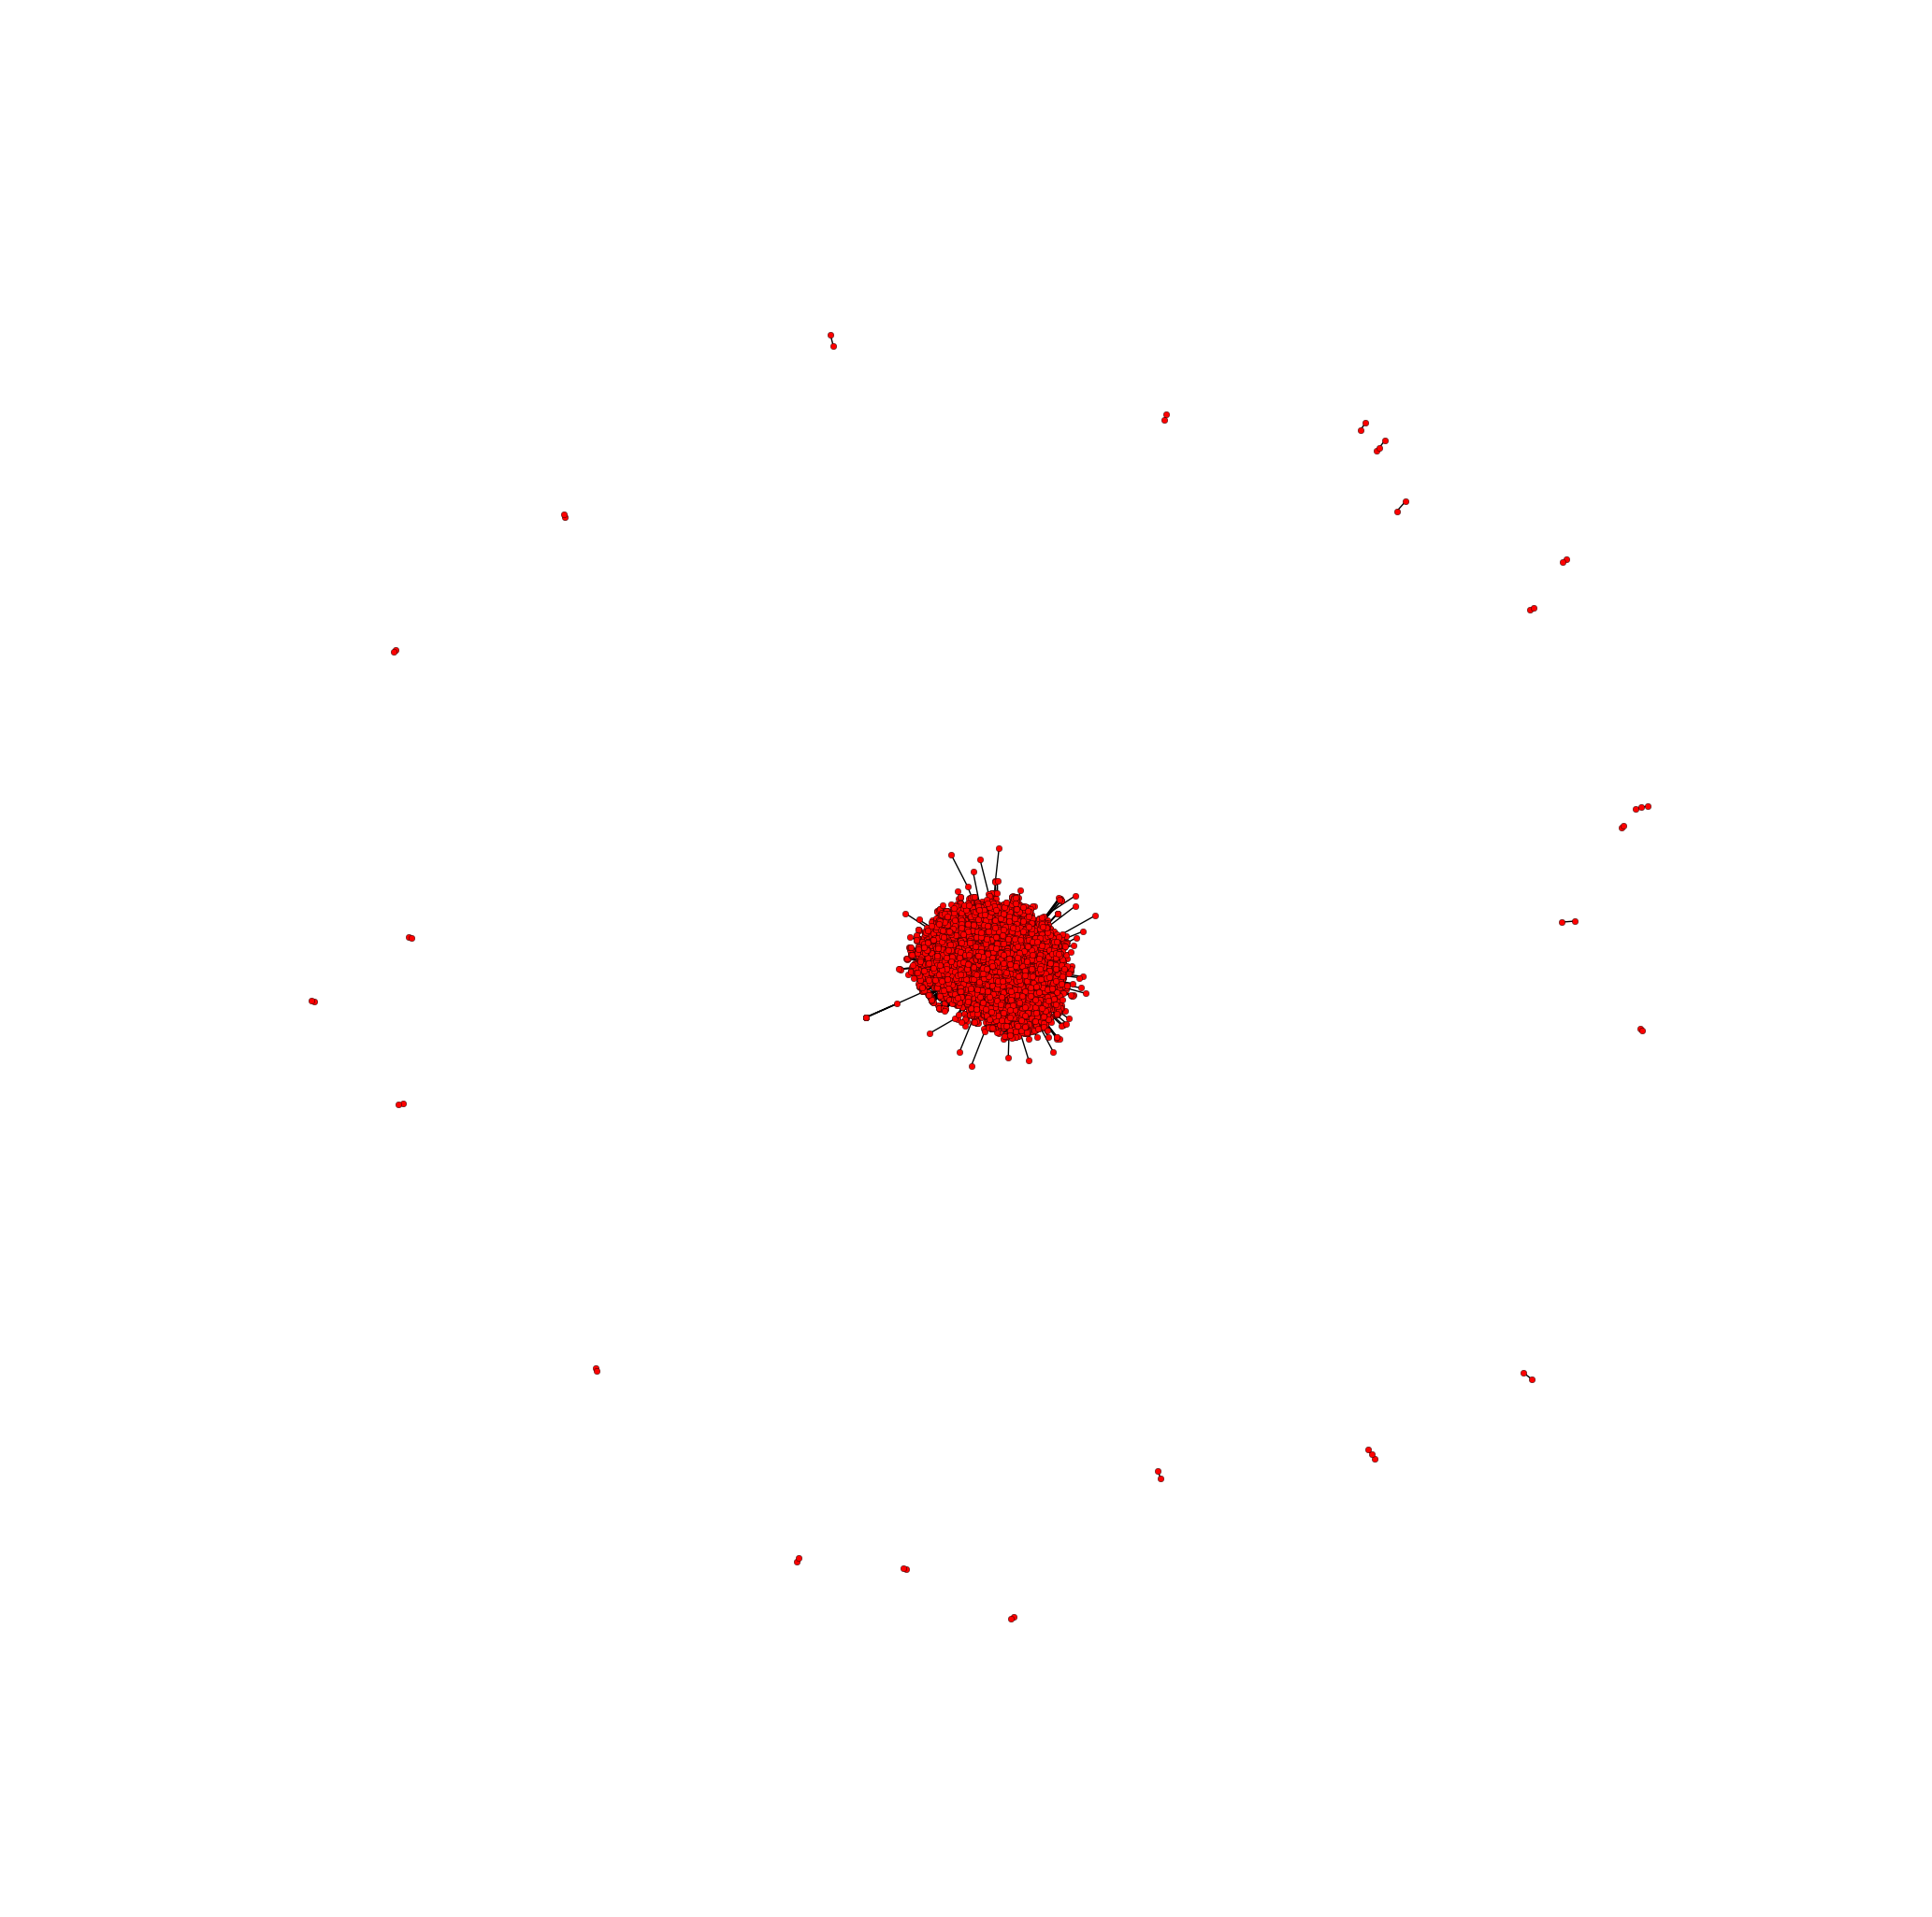

In [4]:
# Draw the graph

plt.figure(figsize=(20, 20))
nx.draw(G, node_size=22)

In [50]:
# Check if the graph is connected

print("Is the graph connected?", nx.is_connected(G))

Is the graph connected? False


In [51]:
# See the number of connected components

print("Number of connected components:",nx.number_connected_components(G))

Number of connected components: 24


In [52]:
# Print the number of nodes for each connected component

[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[7066, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [53]:
# Select the largest connected component

sub_graphs = nx.connected_component_subgraphs(G)
G = sorted(sub_graphs, key = len, reverse=True)[0]

In [15]:
# # If you want to see the nodes, and the relative edges, that are in a given connected component:

# for i,j in enumerate(sub_graphs):
#     print ("subgraph {} has {} nodes".format(i, j.number_of_nodes()))
#     print ("\tNodes:", j.nodes(data=True))
#     print ("\tEdges:", j.edges())

In [16]:
print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))

Number of nodes: 7066
Number of edges: 100736


In [17]:
# check again if the graph is connected
print("Is the graph connected?", nx.is_connected(G))

Is the graph connected? True


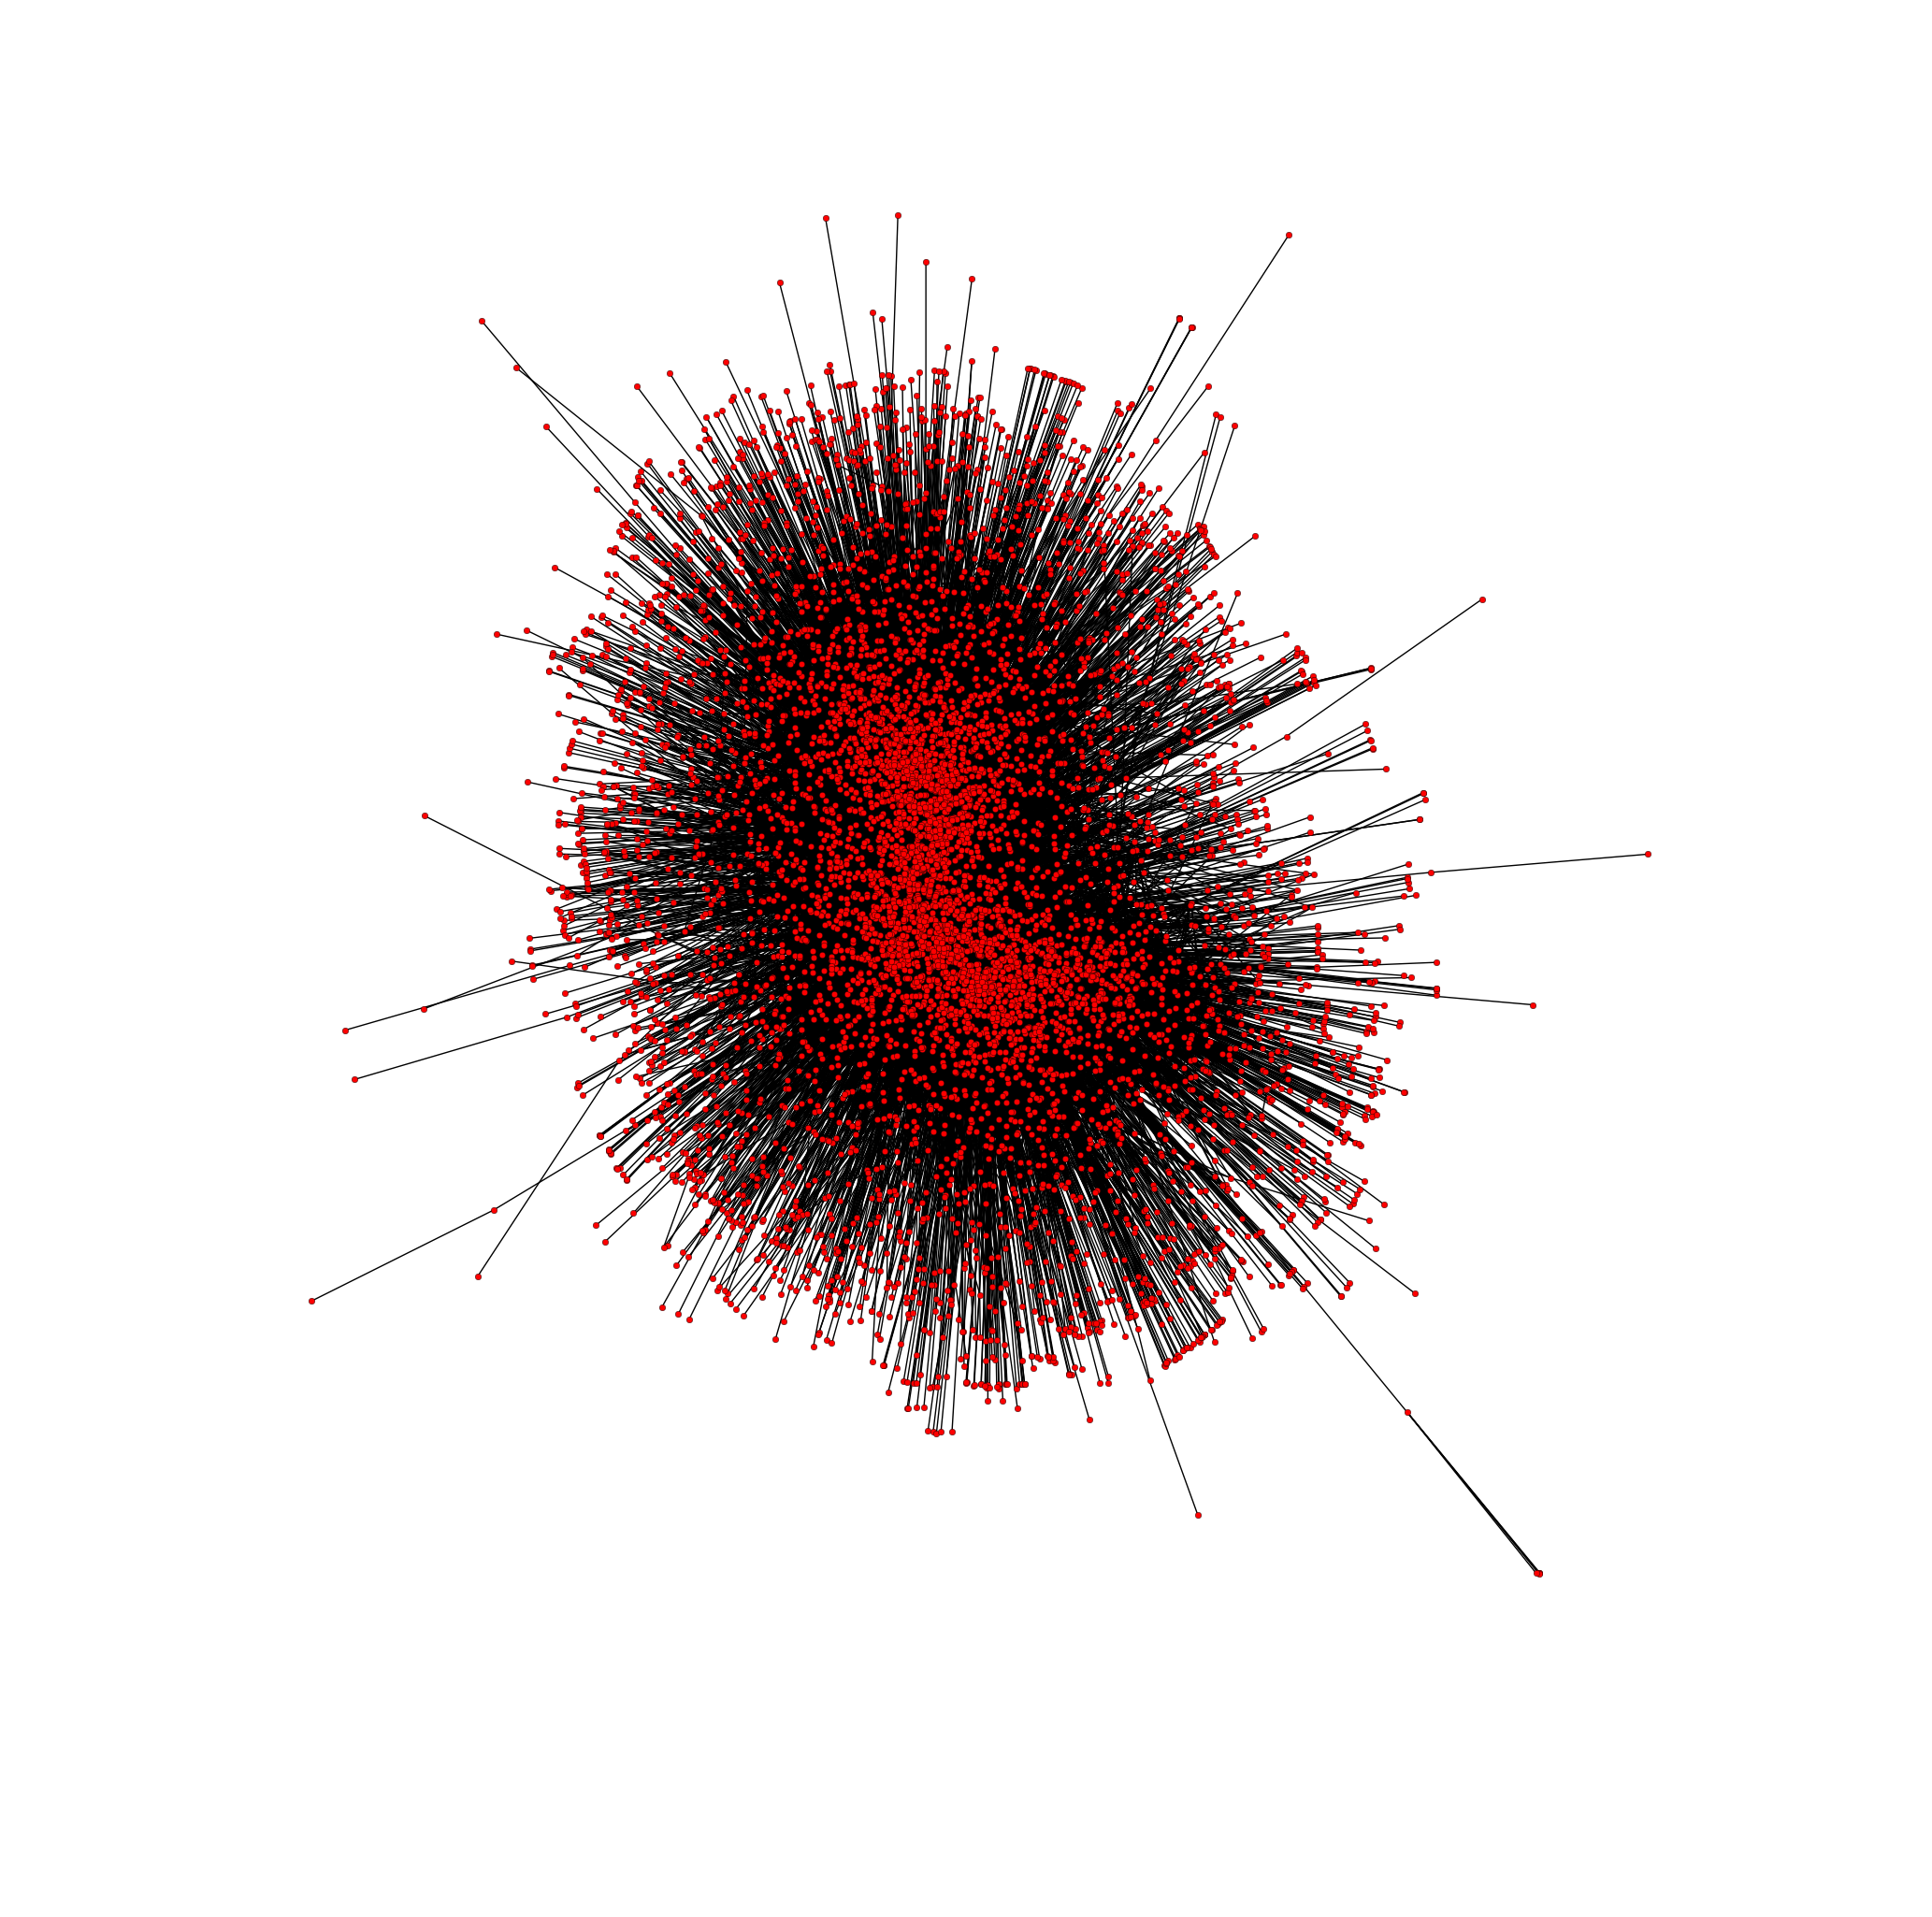

In [18]:
# draw the graph

plt.figure(figsize=(20, 20))
nx.draw(G, node_size=22)

Minimum degree: 1
Maximum degree: 1065


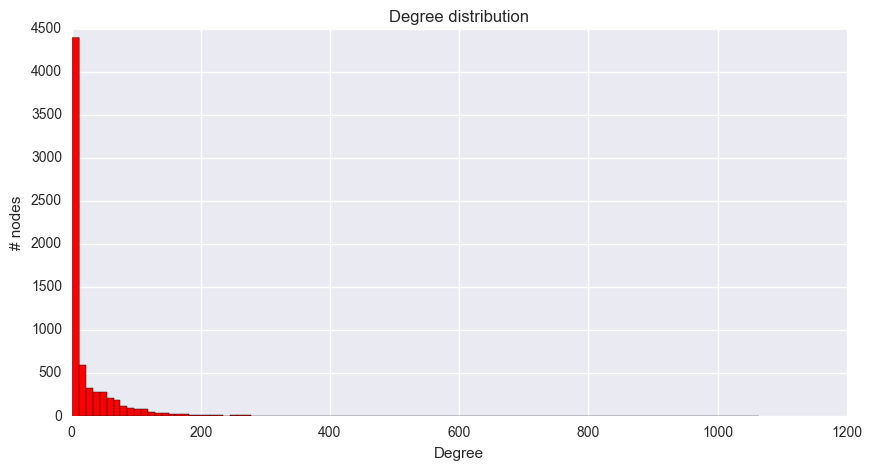

In [19]:
# Compute and plot the degree distribution

degrees = G.degree().values()
print("Minimum degree:", min(degrees))
print("Maximum degree:", max(degrees))
plt.figure(figsize=(10,5))
plt.hist(list(degrees), color = 'red', bins = 100)
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('# nodes')

### 1.2

#### Set up a simulation of an SIR epidemic process on the graph. Start the epidemic from a randomly chosen node. Choose values of model parameters $\beta$ and $\mu$ that allow the epidemic to take off with high probability, reaching most of the nodes.

In [20]:
# Class that simulate an SIR process on a graph

class SIRSimulator:
    def __init__(self,graph,beta=0.25,mu=0.05):
        self.g=graph
        self.BETA=beta
        self.MU=mu
        
    def run(self, seed=[],num_steps=1):
        if not len(seed):
            seed= [np.random.choice(self.g.nodes())]
        I_set=set(seed)
        S_set=set(self.g.nodes()).difference(I_set)
        R_set=set()
        
        t=0
        
        StoI_set= set(seed)
        ItoR_set=set()
        while True:
            if t% num_steps==0:
                yield{ 't':t, "S": S_set, "I":I_set, 'R':R_set,
                      "S->I":StoI_set,"I->R":ItoR_set}
            if not len(I_set):
                break
            
            StoI_set= set()
            ItoR_set= set()
            
            for i in set(I_set):
                for j in S_set.intersection(self.g.neighbors(i)):
                    if np.random.uniform() < self.BETA :
                        S_set.remove(j)
                        I_set.add(j)
                        StoI_set.add(j)
                if np.random.uniform() < self.MU:
                    I_set.remove(i)
                    R_set.add(i)
                    ItoR_set.add(i)
            t+=1

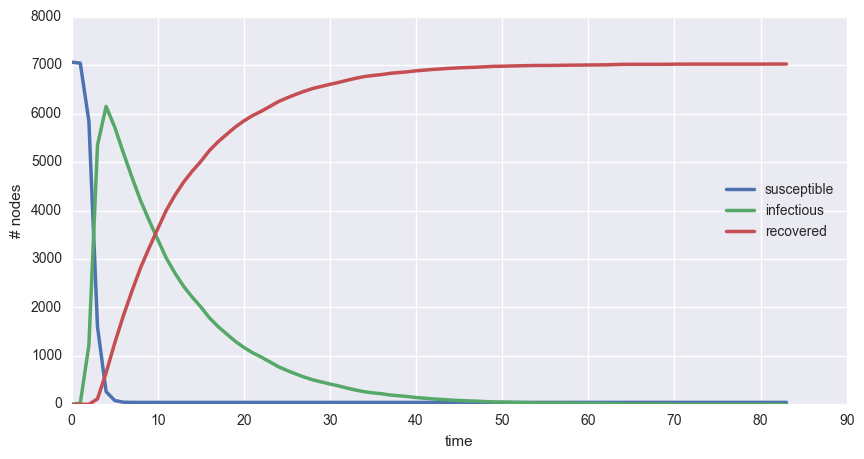

In [21]:
# Set up simulation with beta egual to 0.8 and mu egual to 0.1 and plot it

SIR=SIRSimulator(G,0.8,0.1)

plt.figure(figsize=(10,5))
plt.plot([(len(status['S']), len(status['I']),len(status['R'])) for status in SIR.run()], lw=2.5)
plt.xlabel('time')
plt.ylabel('# nodes')
plt.legend(['susceptible', 'infectious', 'recovered'], fontsize=10, loc='center right')

### 1.3

#### Plot epidemic curves for multiple stochastic realizations of the epidemic. Compute the probability distribution of the overall attack rate (number of recovered nodes at the end of the simulation / total number of nodes) and the probability distribution of peak times for the epidemic. Display these distributions using boxplots.

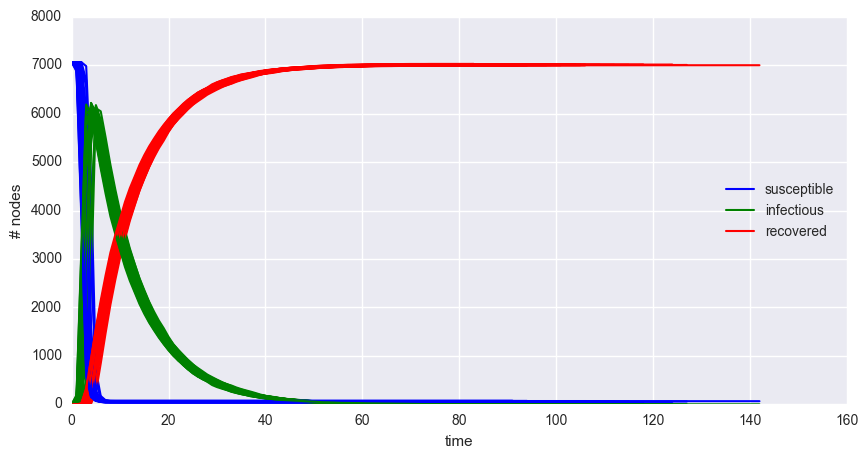

In [27]:
# Create an empty list of the overall attack rate and the peak time
OAR_list, peak_list = [], []
plt.figure(figsize=(10,5))
# Set up the number of simulations equal to 50 
n = 50
for _ in range(n):
    SIR=SIRSimulator(G,0.8,0.1)
    status_list = [(len(status['S']), len(status['I']), len(status['R'])) for status in SIR.run()]
    # Create three list that take respectively the values of the susceptible, infectious and recoved
    S, I, R = [], [], []
    for j in status_list:
        S.append(j[0])
        I.append(j[1])
        R.append(j[2])
    
    # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
    overall_attack_rate = R[-1]/len(G.nodes())
    OAR_list.append(overall_attack_rate)
    
    peak_list.append(np.argmax(I))
    
    plt.plot(S, color = 'blue', lw=1.5)
    plt.plot(I, color = 'green', lw=1.5)
    plt.plot(R, color = 'red', lw=1.5)
    plt.xlabel('time')
    plt.ylabel('# nodes')
    plt.legend(['susceptible', 'infectious', 'recovered'], fontsize=10, loc='center right')

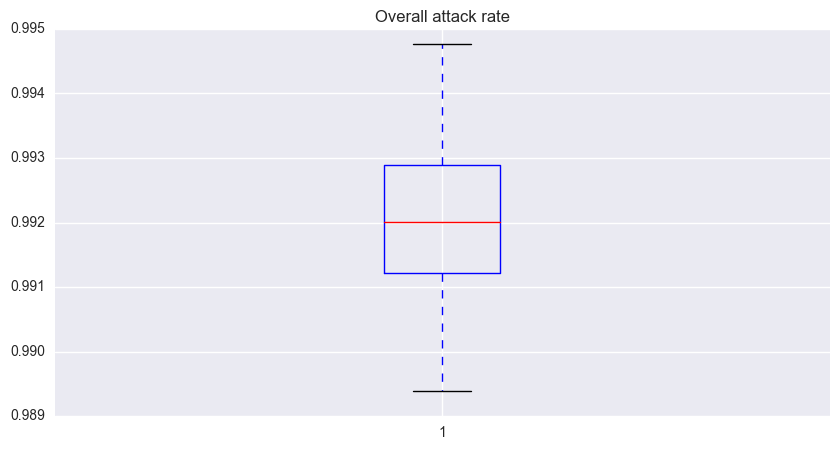

In [28]:
# Boxplot of the overall attack rate

plt.figure(figsize=(10,5))
plt.boxplot(OAR_list)
plt.title('Overall attack rate')

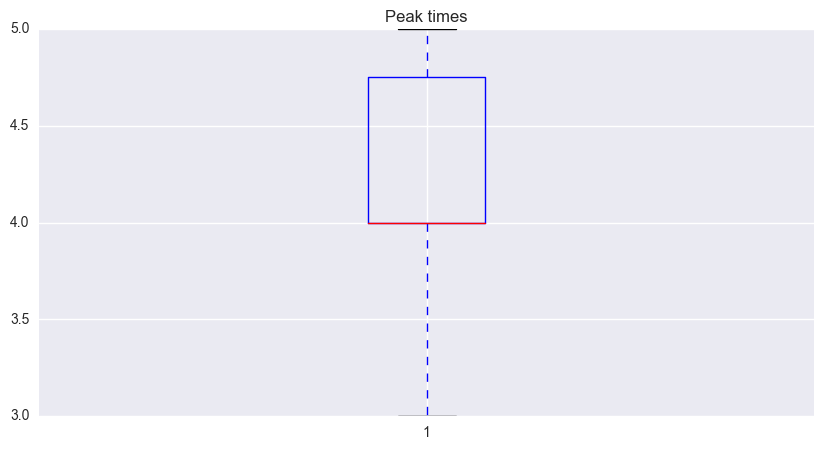

In [29]:
# Boxplot of the peak times
plt.figure(figsize=(10,5))
plt.boxplot(peak_list)
plt.title('Peak times')

## PART 2: VACCINATION AND HERD IMMUNITY

### 2.1

#### Modify the simulation above so that it supports a given initial fraction r of randomly chosen "immunized" nodes, i.e., nodes that cannot be infected. Can you provide an upper bound for the overall attack rate without having to simulate the epidemic?

In [41]:
# Modify the simulation so that it supports a given initial fraction r of randomly chosen "immunized" nodes

class SIRSimulator_modified:
    def __init__(self,graph,beta=0.25,mu=0.05,r=0):
        self.g=graph
        self.BETA=beta
        self.MU=mu
        self.r=r
        
    def run(self, seed=[], immunized_set=[], num_steps=1):
        if not len(seed):
            seed = [np.random.choice(list(set(self.g.nodes()).difference(immunized_set)))]
        
        if not len(immunized_set):
            # n = int(self.r*len(self.g.nodes()))
            immunized_set = set(np.random.choice(self.g.nodes(), int(self.r*len(self.g.nodes())), replace=False))
        
        I_set=set(seed)
        S_set=set(self.g.nodes()).difference(I_set).difference(immunized_set)
        R_set = set()
    
        t=0
        
        StoI_set= set(seed)
        ItoR_set=set()
        while True:
            if t% num_steps==0:
                yield{ 't':t, "S": S_set, "I":I_set, 'R':R_set,
                      "S->I":StoI_set,"I->R":ItoR_set}
            if not len(I_set):
                break
            
            StoI_set= set()
            ItoR_set= set()
            
            for i in set(I_set):
                for j in S_set.intersection(self.g.neighbors(i)):
                    if np.random.uniform() < self.BETA :
                        S_set.remove(j)
                        I_set.add(j)
                        StoI_set.add(j)
                if np.random.uniform() < self.MU:
                    I_set.remove(i)
                    R_set.add(i)
                    ItoR_set.add(i)
            t+=1

Yes, we can provide an upper bound for the overall attack rate without having to simulate the epidemic because considering the formula of the overall attack rate (i.e. the number of recovered nodes at the end of the simulation over the total number of nodes) we will modify the numerator subtracting the immunized nodes

### 2.2

#### For a range of values of the initial fraction of immunized nodes (e.g., r = 0.01, 0.1, 0.5, 0.8, 0.9, ...) simulate the SIR epidemic above (multiple realizations for each value of r) and plot the overall attack rate as a function of the fraction r of immunized nodes.

In [42]:
# Simulate the SIR epidemic for a range of values of the initial fraction of immunized nodes

n = 50
overall_attack_rate_modified = []
r_list = [0.01, 0.1, 0.5, 0.8, 0.9]
for r in r_list:
    OAR_sum = 0
    for _ in range(n):
        SIR=SIRSimulator_modified(G,0.8,0.1,r)
        status_list = [(len(status["S"]), len(status['I']), len(status['R'])) for status in SIR.run()]       
        R = []
        for i in status_list:
            R.append(i[2]) 
        # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
        OAR_sum += R[-1]/len(G.nodes())
    overall_attack_rate_modified.append(OAR_sum/n)

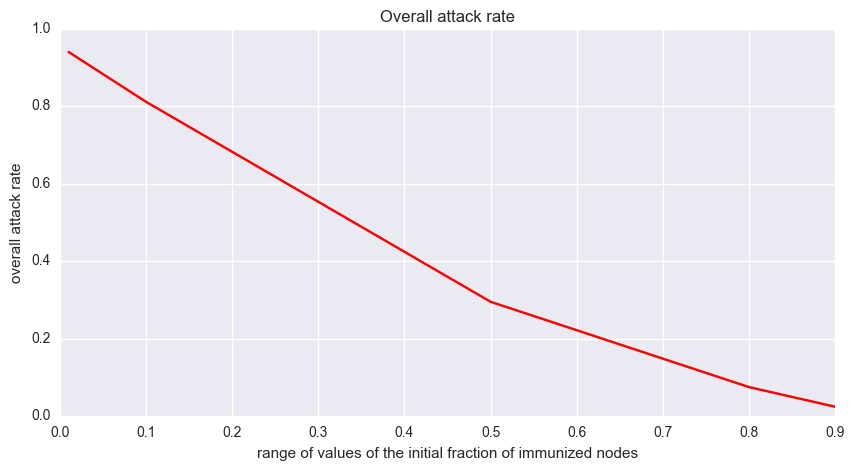

In [43]:
# Plot the overall attack rate as a function of the fraction r of immunized nodes

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified, color='red')
plt.title('Overall attack rate')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')

In [44]:
overall_attack_rate_modified

[0.940198131899236,
 0.8115001415227853,
 0.29562977639399945,
 0.07552787998867813,
 0.02479762241720918]

### 2.3

#### Generate a random Erdős–Rényi graph with the same size and density as the original social network. Repeat the experiment 2.2 above. Compare the results you obtain in this case and in the previous case, and explain the differences you observe.

In [34]:
# Generate a random Erdős–Rényi graph with the same size and density as the original social network

n = len(G.nodes())
p = nx.density(G)
G_er = nx.erdos_renyi_graph(n, p)

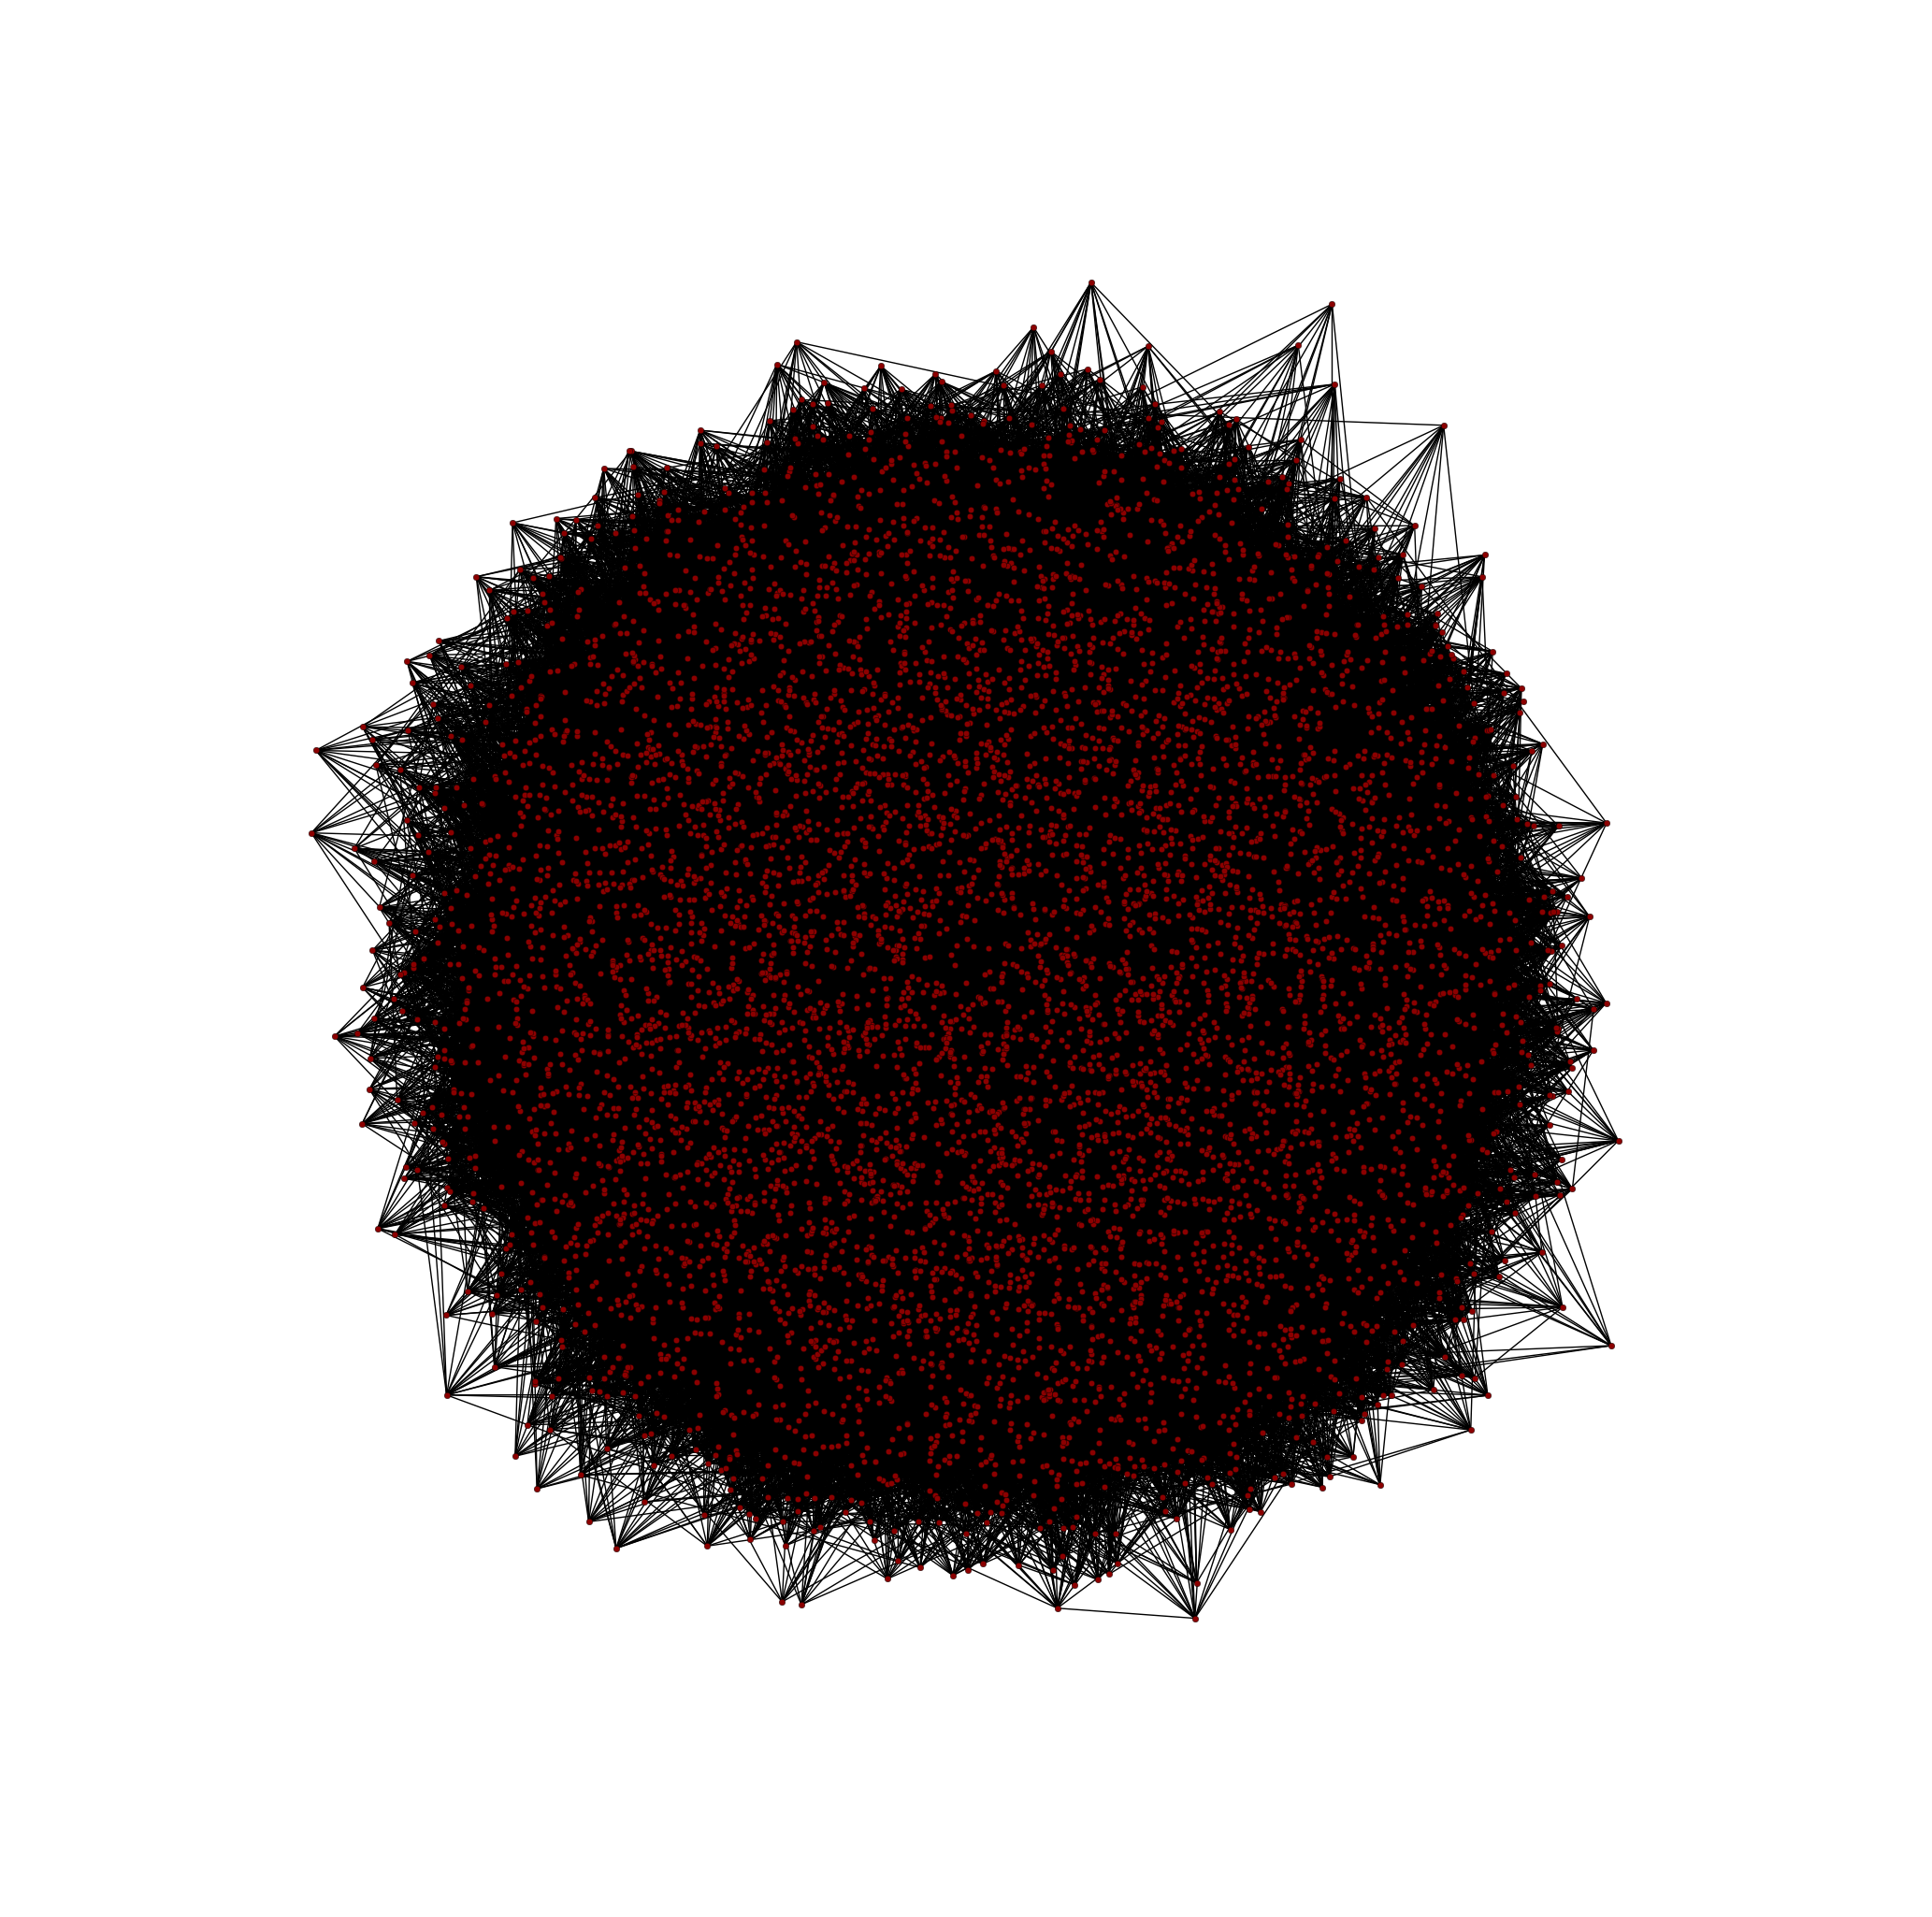

In [35]:
# Draw the graph

plt.figure(figsize=(20, 20))
nx.draw(G_er, node_size=22, node_color = 'darkred')

Minimum degree: 11
Maximum degree: 52


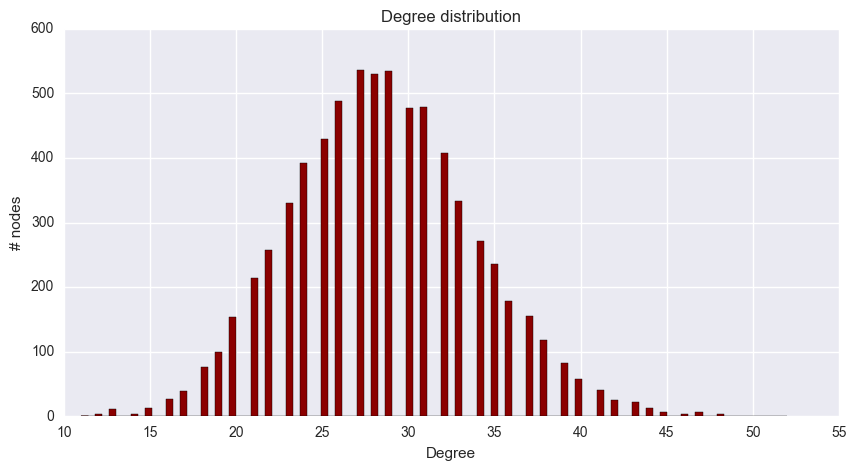

In [36]:
# Compute and plot the degree distribution

degrees = G_er.degree().values()
print("Minimum degree:", min(degrees))
print("Maximum degree:", max(degrees))
plt.figure(figsize=(10,5))
plt.hist(list(degrees), color = 'darkred', bins = 100)
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('# nodes')

In [45]:
# Simulate the SIR epidemic for a range of values of the initial fraction of immunized nodes

n = 50
overall_attack_rate_modified_er = []
r_list = [0.01, 0.1, 0.5, 0.8, 0.9]
for r in r_list:
    OAR_sum = 0
    for _ in range(n):
        SIR=SIRSimulator_modified(G_er,0.8,0.1,r)
        status_list = [(len(status["S"]), len(status['I']), len(status['R'])) for status in SIR.run()]       
        R = []
        for i in status_list:
            R.append(i[2]) 
        # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
        OAR_sum += R[-1]/len(G_er.nodes())
    overall_attack_rate_modified_er.append(OAR_sum/n)

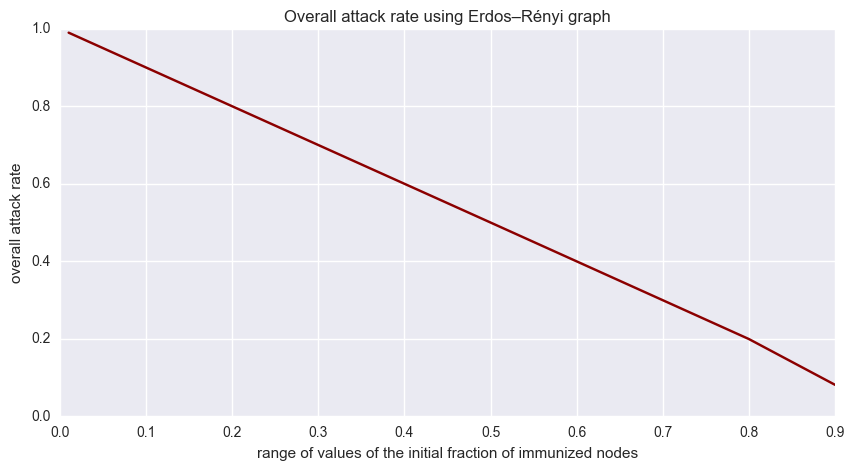

In [46]:
# Plot the overall attack rate as a function of the fraction r of immunized nodes

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified_er, color='darkred')
plt.title('Overall attack rate using Erdos–Rényi graph')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')

In [47]:
overall_attack_rate_modified_er

[0.9900990659496176,
 0.900084913671101,
 0.5000735918482875,
 0.19942258703651283,
 0.081321822813473]

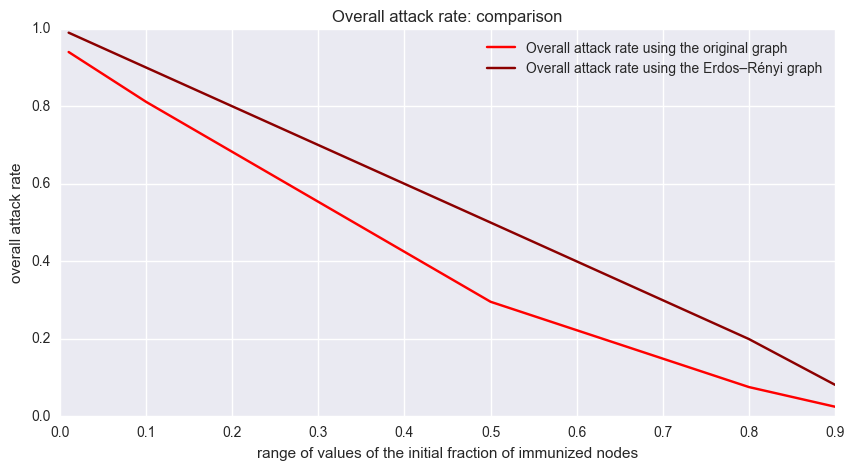

In [48]:
# Plot of the overall attack rate as a function of the fraction r of immunized nodes (original graph versus Erdos–Rényi graph)

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified, color='red')
plt.plot(r_list,overall_attack_rate_modified_er, color='darkred')
plt.title('Overall attack rate: comparison')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')
plt.legend(['Overall attack rate using the original graph','Overall attack rate using the Erdos–Rényi graph'], 
           prop={'size': 10}, loc='upper right')

The overall attack rate obtained using the the Erdos–Rényi graph is bigger than the previous graph, but both follow a similar decreasing behaviour 

If we see the Erdos–Rényi graph, we have a degree distribution where a lot of the nodes will have the same importance on the spread of the infection. We cannot say the same thing about the original graph, i.e. the Wikipedia's network, where the degree distribution is completely different.

## PART 3: TARGETED VACCINATION STRATEGIES

### 3.1

#### Imagine that you have a "budget" of M vaccination doses, with M < N, where N is the size of your network. That is, you can immunize a fraction r = M/N of nodes. You have studied above the effect of randomly immunizing the network nodes. Can you improve the performance of immunization, in terms of reduced overall attack rate, by means of "targeted" immunization? That is, by choosing the nodes to be immunized according to some specific strategy rather than choosing them at random. Provide an example of such a strategy, and test it in simulation, comparing the results you obtain with those of Part 2.2.

In [54]:
# compute the closeness centrality and take the nodes where the centrality is bigger respect to the other nodes

dictionary_cc = nx.closeness_centrality(G)

# list of the nodes ordered according to the values of the closeness centrality

list_cc_nodes = [key for key,value in sorted(dictionary_cc.items(), key=lambda t: t[1], reverse=True)]

In [55]:
# Simulate the SIR epidemic for a range of values of the initial fraction of immunized nodes

n = 50
overall_attack_rate_no_random_nodes = []
r_list = [0.01, 0.1, 0.5, 0.8, 0.9]
for r in r_list:
    n_nodes = int(r*len(G.nodes()))
    # immunized nodes chosen according to some specific strategy (computing the closeness centrality)
    immunized_nodes = list_cc_nodes[:n_nodes]
    OAR_sum = 0
    for _ in range(n):
        SIR=SIRSimulator_modified(G,0.8,0.01)
        status_list=[(len(status["S"]), len(status['I']), len(status['R'])) for status in SIR.run(immunized_set=immunized_nodes)]
        R = []
        for i in status_list:
            R.append(i[2]) 
        # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
        OAR_sum += R[-1]/len(G.nodes())
    overall_attack_rate_no_random_nodes.append(OAR_sum/n)

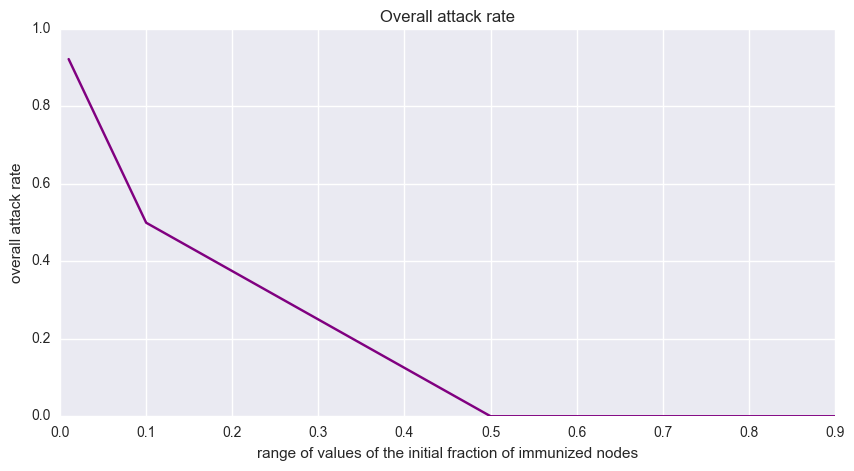

In [56]:
# Plot the overall attack rate as a function of the fraction r of immunized nodes

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_no_random_nodes, color='purple')
plt.title('Overall attack rate')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')

In [57]:
overall_attack_rate_no_random_nodes

[0.921904896688367,
 0.49966034531559567,
 0.00016982734220209443,
 0.00014718369657514845,
 0.00014152278516841197]

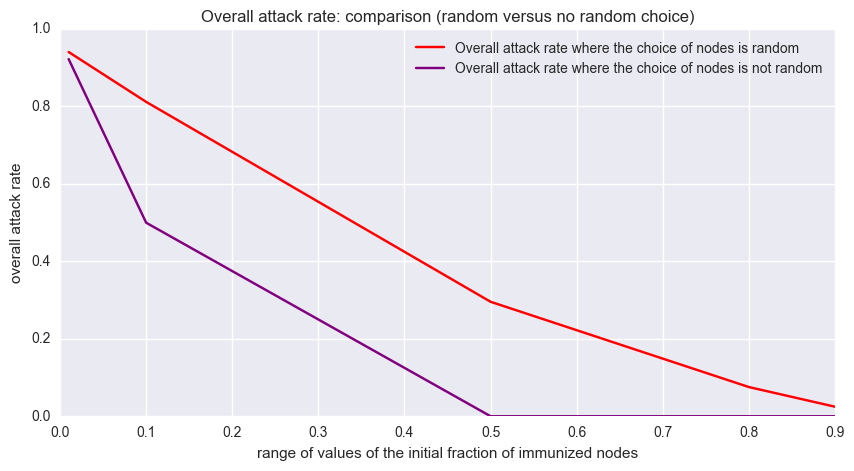

In [58]:
# Plot of the overall attack rate as a function of the fraction r of immunized nodes 

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified, color='red')
plt.plot(r_list,overall_attack_rate_no_random_nodes, color='purple')
plt.title('Overall attack rate: comparison (random versus no random choice)')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')
plt.legend(['Overall attack rate where the choice of nodes is random',
            'Overall attack rate where the choice of nodes is not random'], 
           prop={'size': 10}, loc='upper right')

### 3.2

#### Now imagine that you still have a limited budget of M vaccination doses, but you cannot use information about the graph to decide how to use it. You can simulate a certain number of epidemics, without immunization, and use "historical" information on which nodes are infected (and when, and how often) to define your targeted immunization strategy. Design such a strategy and show its performance in simulation, comparing it to the random immunization of Part 2.2 and the targeted strategy you devised in Part 3.1 above.

Since we cannot use information about the graph to decide how to use our limited budget of M vaccination doses, we will define a new targeted immunization strategy computing the proportion of 'susceptible' that become 'infectious' at time $t$ over the 'infectious' at time $t-1$ and using it

In [60]:
n = 1000

nodes_list = []
for _ in range(n):
    SIR=SIRSimulator_modified(G,0.8,0.1)
    status_list = [(list(status['I']),list(status['S->I'])) for status in SIR.run()]
     
    infected, from_S_to_I = [], []
    for i in status_list:
        infected.append(i[0])
        from_S_to_I.append(i[1])
        
    # Compute the proportion of 'susceptible' that become 'infectious' at time t over the 'infectious' at time t−1  
    infected_proportion = [len(from_S_to_I[i])/len(infected[i-1]) for i in range(1,len(infected))]
    infected_proportion_max_pos = np.argmax(infected_proportion)
    nodes_list.extend(infected[infected_proportion_max_pos])

# Create a dictionary that has got as key the nodes and as value how many times the node appears
dictionary = defaultdict(int)
for i in nodes_list:
    dictionary[i] += 1
list_strategy_nodes = [key for key,value in sorted(dictionary.items(), key=lambda t: t[1], reverse = True)]

In [61]:
# Simulate the SIR epidemic for a range of values of the initial fraction of immunized nodes

n = 50
overall_attack_rate_limited_information = []
r_list = [0.01, 0.1, 0.5, 0.8, 0.9]
for r in r_list:
    n_nodes = int(r*len(G.nodes()))
    immunized_nodes = list_strategy_nodes[:n_nodes]
    OAR_sum = 0
    for _ in range(n):
        SIR=SIRSimulator_modified(G,0.8,0.01)
        status_list=[(len(status["S"]), len(status['I']), len(status['R'])) for status in SIR.run(immunized_set=immunized_nodes)]
        R = []
        for i in status_list:
            R.append(i[2]) 
        # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
        OAR_sum += R[-1]/len(G.nodes())
    overall_attack_rate_limited_information.append(OAR_sum/n)

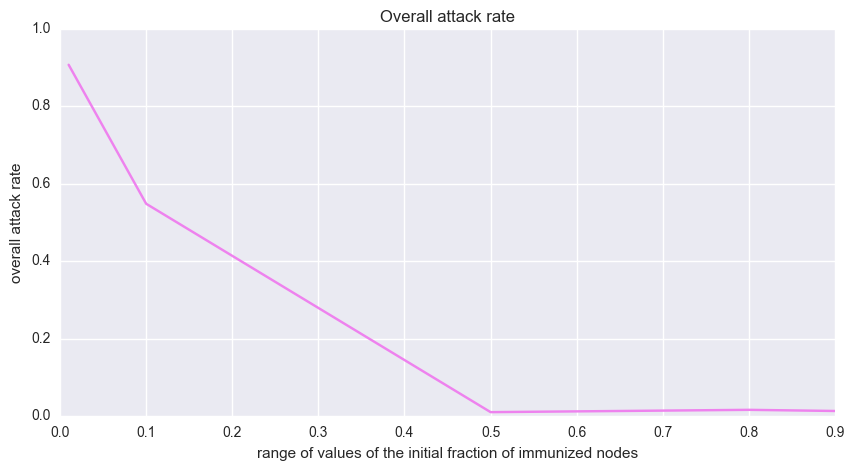

In [62]:
# Plot the overall attack rate as a function of the fraction r of immunized nodes

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_limited_information, color='violet')
plt.title('Overall attack rate')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')

In [63]:
overall_attack_rate_limited_information

[0.9072403056892155,
 0.5486102462496463,
 0.010823662609680169,
 0.01677045004245685,
 0.013812623832437037]

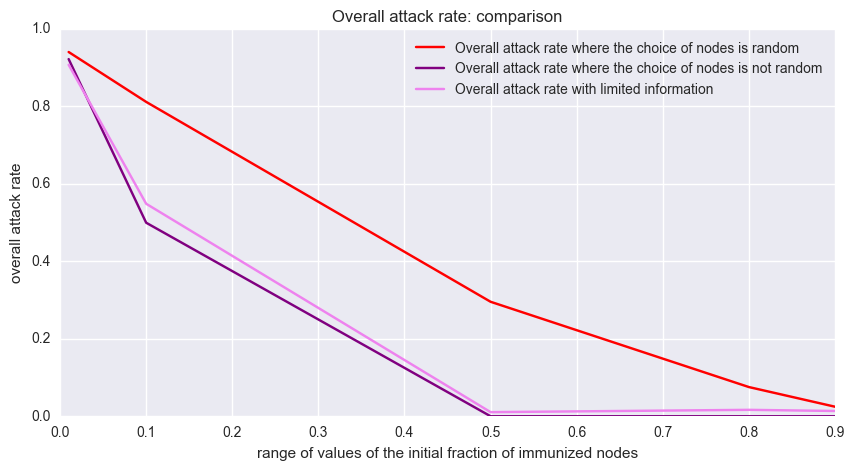

In [64]:
# Plot of the overall attack rate as a function of the fraction r of immunized nodes 

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified, color='red')
plt.plot(r_list,overall_attack_rate_no_random_nodes, color='purple')
plt.plot(r_list,overall_attack_rate_limited_information, color='violet')
plt.title('Overall attack rate: comparison')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')
plt.legend(['Overall attack rate where the choice of nodes is random',
            'Overall attack rate where the choice of nodes is not random',
           'Overall attack rate with limited information'], 
           prop={'size': 10}, loc='upper right')

### 3.3

#### Finally, imagine that you have limited information about the social network: you are given a set of K nodes (K << N, say K ~ 10% of the network) and for those K nodes you are given a list of their neighbors. Design a targeted immunization strategy that makes use of this information, and test its performance in simulation.

In [65]:
# create the graph 

n = int(0.1*len(G.nodes()))
n_nodes = np.random.choice(G.nodes(),n)
edges_list = [] 
for e in G.edges():
    if len(set(n_nodes).intersection(e)):
        edges_list.append(e)
G_reduced = nx.Graph(edges_list)

In [104]:
# Compute the closeness centrality and take the nodes where the centrality is bigger respect to the other nodes

dictionary_cc_reduced = nx.closeness_centrality(G_reduced)
list_cc_nodes_reduced = [key for key,value in sorted(dictionary_cc_reduced.items(), key=lambda t: t[1], reverse=True)]

In [105]:
# Simulate the SIR epidemic for a range of values of the initial fraction of immunized nodes

n = 50
overall_attack_rate_limited_k_nodes = []
r_list = [0.01, 0.1, 0.5, 0.8, 0.9]
for r in r_list:
    n_nodes = int(r*len(G.nodes()))
    immunized_nodes = list_cc_nodes_reduced[:n_nodes]
    OAR_sum = 0
    for _ in range(n):
        SIR=SIRSimulator_modified(G,0.8,0.01)
        status_list=[(len(status["S"]), len(status['I']), len(status['R'])) for status in SIR.run(immunized_set=immunized_nodes)]
        R = []
        for i in status_list:
            R.append(i[2])
        # Compute the overall attack rate (R[-1] is the number of recovered nodes at the end of the simulation)
        OAR_sum += R[-1]/len(G.nodes())
    overall_attack_rate_limited_k_nodes.append(OAR_sum/n)

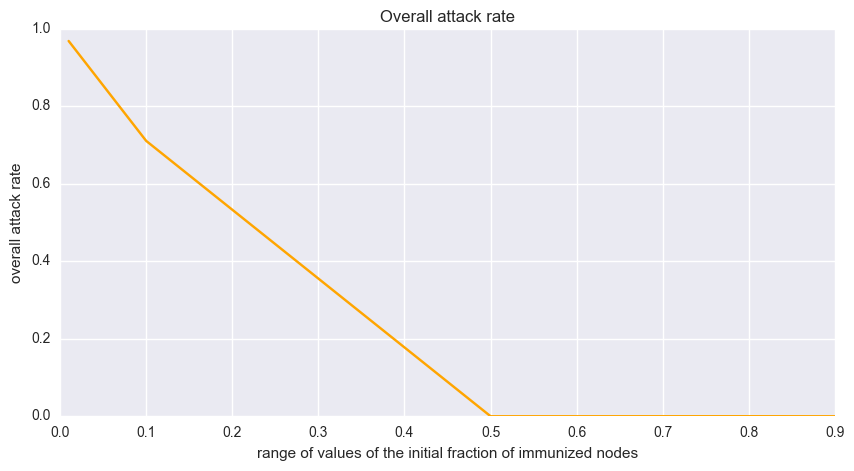

In [106]:
# Plot the overall attack rate as a function of the fraction r of immunized nodes

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_limited_k_nodes, color='orange')
plt.title('Overall attack rate')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')

In [107]:
overall_attack_rate_limited_k_nodes

[0.9686385508066799,
 0.7108972544579678,
 0.0001415227851684121,
 0.0002830455703368242,
 0.0001415227851684121]

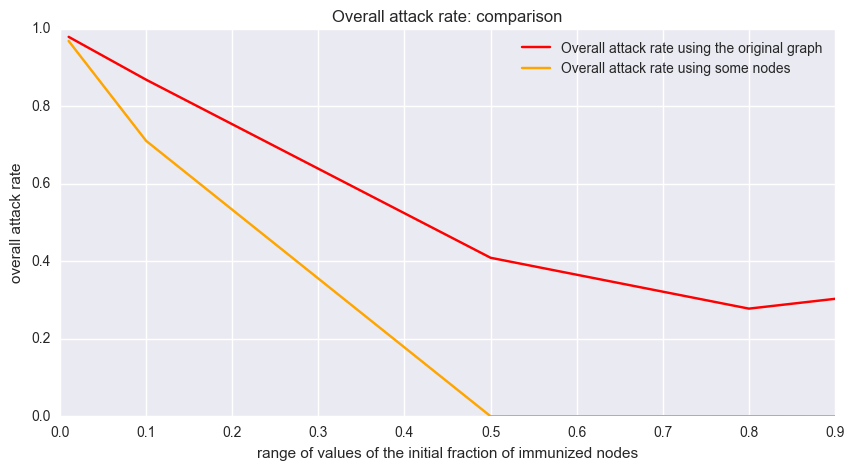

In [108]:
# Plot of the overall attack rate as a function of the fraction r of immunized nodes 

plt.figure(figsize=(10,5))
plt.plot(r_list,overall_attack_rate_modified, color='red')
plt.plot(r_list,overall_attack_rate_limited_k_nodes, color='orange')
plt.title('Overall attack rate: comparison')
plt.xlabel('range of values of the initial fraction of immunized nodes')
plt.ylabel('overall attack rate')
plt.legend(['Overall attack rate using the original graph',
            'Overall attack rate using some nodes'], 
           prop={'size': 10}, loc='upper right')